## Decision Tree Alogorithm

In [1]:
import pandas as pd

### Data collection

In [2]:
dataset = pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


### Data preprocessing

In [4]:
dataset=pd.get_dummies(dataset, dtype=int,drop_first=True)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

### Input Output split

In [7]:
independent = dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
dependent = dataset[['charges']]

In [8]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [9]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


### Train Test split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(independent,dependent,test_size=0.20,random_state=0)

### Standardization

In [11]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [12]:
X_train

array([[-0.14853305,  0.54530479,  2.41394802,  1.01506676,  1.97125461],
       [-1.49780784,  0.59867181, -0.89219519,  1.01506676, -0.50729114],
       [-1.14273553,  0.96092064,  0.76087642, -0.98515688,  1.97125461],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519,  1.01506676, -0.50729114],
       [-1.42679338,  0.77656186, -0.89219519,  1.01506676, -0.50729114],
       [-0.4325909 , -1.97749955, -0.06565939, -0.98515688, -0.50729114]])

In [13]:
X_train.shape

(1070, 5)

In [14]:
X_test

array([[ 0.91668389, -0.08539629, -0.06565939,  1.01506676, -0.50729114],
       [ 0.56161157, -0.21962242, -0.06565939, -0.98515688, -0.50729114],
       [ 0.63262604,  1.59081313,  0.76087642,  1.01506676,  1.97125461],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519,  1.01506676, -0.50729114],
       [-0.64563429,  1.34581001,  1.58741222, -0.98515688,  1.97125461],
       [ 0.49059711, -0.95948331,  1.58741222,  1.01506676, -0.50729114]])

In [15]:
X_test.shape

(268, 5)

### Train Set

### Model Creation

In [103]:
from sklearn.tree import DecisionTreeRegressor
# Hyper Tuning Parameters
#(criterion = 'squared_error', 'friedman_mse', 'absolutr_error', 'poisson')
#(splitter = 'best', 'random')
#(max_features = 'sqrt', 'log2')
DecisionTree = DecisionTreeRegressor(criterion = 'poisson', splitter = 'best', max_features = 'log2' ) 
DecisionTree.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='poisson', max_features='log2')

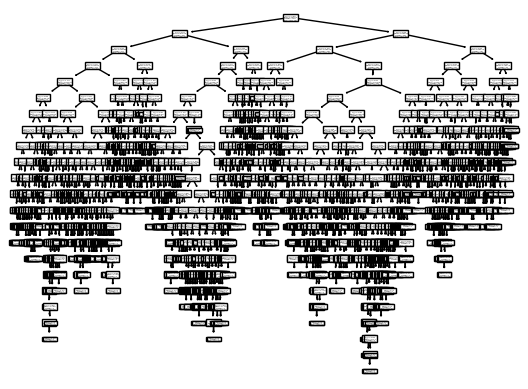

In [104]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(DecisionTree)
plt.show()

### Test Set

In [108]:
Y_pred = DecisionTree.predict(X_test)

### Evaluation Metrics

In [109]:
from sklearn.metrics import r2_score
R2_score = r2_score(Y_test,Y_pred)

### R2 Value

In [110]:
R2_score

0.7241730915525881

### Save the Model

In [111]:
import pickle
filename = "Final_DecisionTree_Model.sav"
pickle.dump(DecisionTree,open(filename,'wb'))

In [112]:
### Load the best model and check for the prediction

In [113]:
load_model = pickle.load(open("Final_DecisionTree_Model.sav",'rb'))

In [115]:
result = load_model.predict([[31,28.5,2,1,0]])
result

array([16085.1275])